In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
coronavirus = pd.read_csv('patient2.csv')
coronavirus.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coronavirus.shape

(1085, 27)

In [5]:
#coronavirus['death'] = coronavirus['death'].astype('Int64')
#coronavirus['age'] = coronavirus['age'].astype('Int64')
coronavirus = coronavirus[['gender', 'age', 'death', 'symptom']]
coronavirus = coronavirus[coronavirus['gender'].notna()]
coronavirus['symptom'] = coronavirus['symptom'].fillna(0)
coronavirus = coronavirus[coronavirus['age'].notna()]
coronavirus['gender'].replace(['male', 'female'], [0, 1], inplace=True)
coronavirus.head()

,gender,age,death,symptom
0,0,66.0,0,0
1,1,56.0,0,0
2,0,46.0,0,0
3,1,60.0,0,0
4,0,58.0,0,0


In [6]:
symptom = coronavirus['symptom']
coronavirus['symptom'] = symptom[symptom != 0] = 1
symptom.tail()
coronavirus.tail()

,gender,age,death,symptom
1027,0,58.0,0,0
1029,1,27.0,0,0
1030,1,25.0,0,1
1052,1,45.0,0,0
1084,0,70.0,0,0


In [7]:
coronavirus['death'].replace(['2/21/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/21/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/19/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/19/2020'], [1], inplace=True)
coronavirus['death'].replace(['02/01/20'], [1], inplace=True)
coronavirus['death'].replace(['2/27/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/25/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/22/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/24/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/23/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/26/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/23/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/23/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/23/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/25/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/27/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/26/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/28/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/13/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/26/2020'], [1], inplace=True)
coronavirus['death'].replace(['2/14/2020'], [1], inplace=True)

In [8]:
#Besoin de (sex), (birth_year), (disease)
from sklearn.neighbors import KNeighborsClassifier

y = coronavirus['death']
y=y.astype('int')
X = coronavirus.drop('death', axis=1)
X=X.astype('int')

In [9]:
coronavirus.shape

(825, 4)

In [10]:
model = KNeighborsClassifier()
model.fit(X, y)
model.score(X, y)

0.9321212121212121

In [11]:
def survie(model):
    gender = input('What is your sex?: ')
    age = input('What is your birth year?: ')
    symptom = input('Do you have any symptom?: ')
    x = np.array([gender, age, symptom]).reshape(1, 3)
    test = model.predict_proba(x).T
    print(model.predict(x))    
    print(model.predict_proba(x))
    print(model.predict_proba(x).shape)
    print(test[0])
    print(test[1])

In [13]:
survie(model)

What is your sex?: 1
What is your birth year?: 1
Do you have any symptom?: 1
[0]
[[1. 0.]]
(1, 2)
[1.]
[0.]


In [14]:
full_table = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

In [17]:
from sklearn.decomposition import PCA
model = PCA(n_components=3)
X_reduced = model.fit_transform(X)

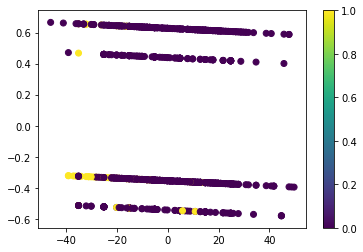

In [18]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()